# Завдання №6

### Задано N кіл (відомі координати центра та радіус). Перевірити, чи мають ці кола спільні точки. Знайти площу фігури, що утворилась в результаті їх перетину.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from itertools import combinations

Координати центра та радіуси кіл будемо записувати у файл з назвою 'circles.txt' та зчитувати з нього дані у двовимірний масив за допомогою функції read_file(filename). На момент виконання вміст цього файлу наступний: 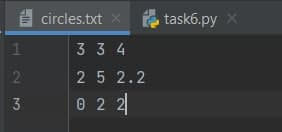

In [2]:
file = 'circles.txt'

In [3]:
def read_file(filename):
    with open(filename) as f:
        array = []
        for line in f:
            array.append([float(x) for x in line.split()])
    return array

In [4]:
circles_data = read_file(file)

Знайдемо усі комбінації пар заданих кіл

In [5]:
n = len(circles_data)
k = 2
comb_list = list(combinations(circles_data, k))

Визначаємо чи пари кіл зі списку comb_list перетинаються. Для цього знаходимо відстань між центрами цих кіл і якщо ця відстань буде меншою за суму радіусів кіл, тоді вони перетинаються. N кіл не будуть перетинатися, якщо хоча б одна з пар не перетинається

In [6]:
intersect_bool = []
for circles_pair in comb_list:
    x1, y1, r1 = circles_pair[0]
    x2, y2, r2 = circles_pair[1]

    distance = ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5
    if distance <= r1 + r2:
        intersect_bool.append(True)
    else:
        intersect_bool.append(False)

Записуємо функцію graph(data, graph_type=None, smallest=None, points=None), яка приймає список кіл з їхніми центрами та радіусами, тип графіку (None - просто кола, 1 - кола та обриси квадрата, що описаний навколо найменшого кола, 2 - випадково згенеровані точки всередині квадрату), найменше коло та випадково згенеровані точки

In [7]:
def graph(data, graph_type=None, smallest=None, points=None):
    figure, ax = plt.subplots()
    ax.set_aspect('equal')
    for circle in data:
        ax.add_artist(plt.Circle((circle[0], circle[1]), circle[2],
                                 color='r', alpha=.2))
    ax.set_xlim(-3, 8)
    ax.set_ylim(-3, 8)
    ax.grid(linewidth=0.2)

    if graph_type == '1':
        side = 2 * smallest[2]
        x_lb = smallest[0] - side / 2
        y_lb = smallest[1] - side / 2
        square = plt.Rectangle((x_lb, y_lb), side, side,
                               fc='none', ec='black', lw=0.5)
        ax.add_artist(square)

    if graph_type == '2':
        x, y = list(zip(*points))
        plt.scatter(x, y, color='black', s=0.05)

    plt.show()

Вводимо функцію MonteCarlo(), яка обчислює потрібну площу. Маємо ще декілька функцій всередині MonteCarlo(): 
    find_smallest_circle(data) - для знаходження найменшого кола зі списку усіх кіл
    generate_points(a, b, radius, n) - для генерування випадкових чисел, використовується функція np.random.uniform; повертається список з пар точок (x, y)
    points_in_intersection(xy, data) - для знаходження точок, що увійшли в перетин; виконується перевірка чи належить точка усім колам: якщо так - залишається у списку, ні - видаляється; умова задається наступна: $(x - x_{центр})^2 + (y - y_{центр})^2 < r^2$, де $x_{центр}, y_{центр}$ - координати точки центра кола, $x, y$ - координати точки, яку перевіряємо на входження, $r$ - радіус кола
   
Обчислюємо довжину списку inside_intersection, що є списком точок, які увійшли в перетин, і отримуємо їх кількість. Знаходимо площу квадрата, що описаний навколо найменшого кола за формулою: $S = (2r)^2$, де $r$ - радіус найменшого кола. І, нарешті, обчислюємо площу перетину: $S_{перетин} = S \frac{n}{N}$, де $n$ - кількість точок, що увійшли в перетин, $N$ - загальна кількість точок, у даному випадку N = 100 000

In [8]:
def MonteCarlo():
    graph(circles_data)

    def find_smallest_circle(data):
        R = []
        for i in range(len(data)):
            R.append(data[i][2])
        min_radius = min(R)

        return data[R.index(min_radius)]

    def generate_points(a, b, radius, n):
        xr = np.random.uniform(a - radius, a + radius, n)
        yr = np.random.uniform(b - radius, b + radius, n)
        return list(zip(xr, yr))

    def points_in_intersection(xy, data):
        result = []
        x_point, y_point = list(zip(*xy))
        center_x, center_y, radius = list(zip(*data))
        for i in range(len(x_point)):
            result.append([x_point[i], y_point[i]])
            for j in range(len(data)):
                if ((x_point[i] - center_x[j])**2 + (y_point[i] - center_y[j])**2) >= (radius[j] ** 2):
                    result.pop(-1)
                    break
        return result

    smallest_circle = find_smallest_circle(circles_data)
    x, y, r = smallest_circle
    graph(circles_data, '1', smallest=smallest_circle)

    m = 1000000
    xy_random = generate_points(x, y, r, m)
    graph(circles_data, '2', points=xy_random)

    inside_intersection = points_in_intersection(xy_random, circles_data)
    graph(circles_data, '2', points=inside_intersection)
    
    points_amount = len(inside_intersection)
    S = (2 * r) ** 2
    s = S * points_amount / m

    print(f'\nThe radius of the smallest circle is equal to: {r}\n'
          f'The area of the square is equal to: {S}\n'
          f'Out of {m} points, {points_amount} got inside the intersection of the circles\n'
          f'The area of the circles intersection is equal to: {s}')


The circles intersect


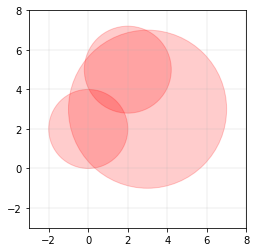

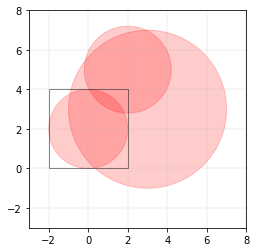

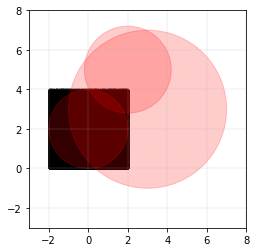

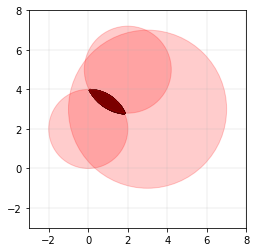


The radius of the smallest circle is equal to: 2.0
The area of the square is equal to: 16.0
Out of 1000000 points, 53295 got inside the intersection of the circles
The area of the circles intersection is equal to: 0.85272


In [9]:
if __name__ == '__main__':
    if all(intersect_bool):
        print(f'\nThe circles intersect')
        MonteCarlo()
    else:
        print(f'\nThe circles NOT intersect')
        exit(1)